# Exercício sobre métricas de classificação

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar o exercício, vá até o menu do Colab e selecione a opção para fazer download do notebook.
    * Os notebooks têm extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção para anexar arquivos à tarefa.
4. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão consideradas.
5. Não se esqueça de colocar seu nome e número de matrícula no campo abaixo.


**Nome e matrícula**: Hyago Vieira Lemes Barbosa Silva 922



## Exercício sobre classificação binária com base de dados sintética.

1. Execute a célula abaixo para importar os dados e as bibliotecas necessárias. Ela irá gerar a base de dados que será usada neste exercício.

A base de dados possui 10 atributos e 1 rótulo binário. Portanto, temos um problema de classificação binária, ou seja, com duas classes.

Note que a base de dados já está dividida em conjuntos de treinamento, validação e teste.

In [1]:
# Importe todas os módulos necessários.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Número total de exemplos.
N = 500000

# Cria a base de dados.
X, y = make_classification(n_samples=N, n_features=10, weights=(0.999, 0.001))

# Divide o conjunto total de amostras em conjuntos de treinamento e validação/teste.
# O parâmetro 'stratify=y' garante que as proporções de classes sejam mantidas nos conjuntos divididos.
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Divide o conjunto de validação/teste em conjuntos de validação e teste.
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test)

2. Execute a célula de código abaixo e analise a quantidade de exemplos de cada classe.

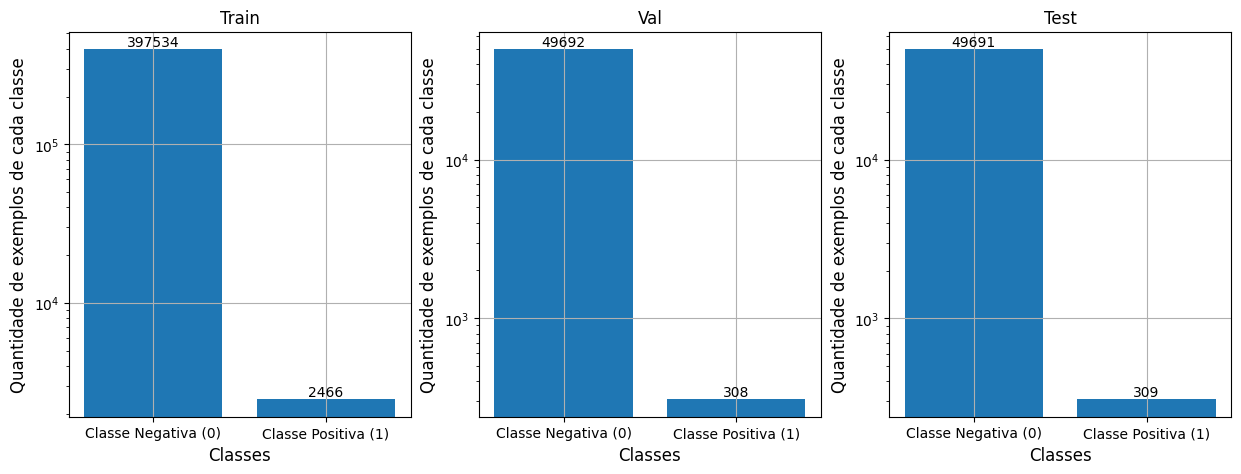

In [2]:
# Plota histograma com a quantidade de exemplos por classe de cada subconjunto.
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))

bars_train = ax1.bar(['Classe Negativa (0)','Classe Positiva (1)'], [len(y_train[y_train==0]), len(y_train[y_train==1])])
ax1.bar_label(bars_train)
ax1.grid()
ax1.set_title('Train')
ax1.set_xlabel('Classes', fontsize=12)
ax1.set_ylabel('Quantidade de exemplos de cada classe', fontsize=12)
ax1.set_yscale('log')

bars_val = ax2.bar(['Classe Negativa (0)','Classe Positiva (1)'], [len(y_val[y_val==0]), len(y_val[y_val==1])])
ax2.bar_label(bars_val)
ax2.grid()
ax2.set_title('Val')
ax2.set_xlabel('Classes', fontsize=12)
ax2.set_ylabel('Quantidade de exemplos de cada classe', fontsize=12)
ax2.set_yscale('log')

bars_test = ax3.bar(['Classe Negativa (0)','Classe Positiva (1)'], [len(y_test[y_test==0]), len(y_test[y_test==1])])
ax3.bar_label(bars_test)
ax3.grid()
ax3.set_title('Test')
ax3.set_xlabel('Classes', fontsize=12)
ax3.set_ylabel('Quantidade de exemplos de cada classe', fontsize=12)
ax3.set_yscale('log')

plt.show()

3. Após ter analisado a quantidade de exemplos em cada uma das duas classes no item anterior, o que se pode concluir sobre elas?


## **Resposta**

### <font color="cyan"/> Possui uma quantidade distânte de valores para classe positiva e negativa, ou seja, desbalanceada, portanto caso usássemos Acurácia para avaliar o modelo poedmos ter a sensação enganosa e isto gerando problemas, portanto, precisamos de outras métricas. A melhor métrica para análise do modelo é Recall, ou Precisão, depende, pois a quantidade de classe negativa é alta, muito superior a classe positiva, portanto, o custo alto pode ser tanto para falsos positivos quanto falsos negativos, depende, isto pode ser analisado melhor varificando após treinado o valor sobre treino, validação e teste, dependendo iremos selecionar a métrica de análise, para ter uma análise boa. Então se o valor se mantem sobre dados genéricos e testes, analisando precisão, usaremos precisão e a maioria dos dados da classe negativa são falsos positivos, caso contrário usando Recall, a maioria dos dados são falsos negativos. Ou o melhor caso que combina ambos, também seria uma boa verificação no caso F1-score. De qualquer forma é necessário balancear as classes

4. Normalize os conjuntos de dados.

**DICAS**

+ Para padronizar, utilize a classe `MinMaxScaler` da biblioteca SciKit-Learn. Para mais informações, acesse [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

In [12]:

from sklearn.preprocessing import MinMaxScaler

# Digite aqui o código do exercício.

scaler = MinMaxScaler()

X_std_train = scaler.fit_transform(X_train)
X_std_val = scaler.transform(X_val)
X_std_test = scaler.transform(X_test)


print('dados de teste antes da padronização\n\n',X_test,'\n\nvalor máximo:\n',X_test.max(),'\nvalor mínimo\n',X_test.min(),'\n')
print('dados de teste após padronização usando MinMaxScaler:\n\n', X_std_test,'\n\nvalor maximo\n', X_std_test.max() ,'\nvalor mínimo\n',X_std_test.min(),'\n\n\n')

print('dados de treino após padronização usando MinMaxScaler:\n\n', X_std_train,'\n\nvalor maximo\n', X_std_train.max() ,'\nvalor mínimo\n',X_std_train.min(),'\n\n\n')

print('dados de validação após padronização usando MinMaxScaler:\n\n', X_std_val,'\n\nvalor maximo\n', X_std_val.max() ,'\nvalor mínimo\n',X_std_val.min(),'\n\n\n')


dados de teste antes da padronização

 [[-1.08421462 -0.98342879  0.73836361 ... -1.15088641 -0.23404334
  -0.43351463]
 [ 0.62910017 -1.10930426  0.84295346 ... -1.28963507 -0.68097013
  -0.70121485]
 [ 0.27111019 -0.86259232  0.58663222 ... -1.0612765  -2.01964225
  -0.68223811]
 ...
 [-0.41397492 -1.07455333  0.70604268 ... -1.3430668  -0.72281514
  -0.60885207]
 [-0.51481133  0.0577763  -1.03098692 ... -0.77099141 -0.16047177
   0.33980745]
 [ 0.87312001 -1.0834243   1.03113457 ... -1.08305918  0.04205041
   0.93883165]] 

valor máximo:
 4.610534214005424 
valor mínimo
 -5.235905165274055 

dados de teste após padronização usando MinMaxScaler:

 [[0.36811276 0.36789764 0.63735833 ... 0.46358491 0.47909243 0.44411954]
 [0.54506899 0.34935301 0.65285555 ... 0.44895907 0.42871185 0.41540218]
 [0.50809473 0.3856999  0.61487607 ... 0.47303091 0.27780779 0.4174379 ]
 ...
 [0.4373371  0.35447269 0.63256929 ... 0.44332671 0.4239948  0.42531034]
 [0.42692242 0.5212934  0.37519116 ... 0.5036

5. Treine uma rede neural com o conjunto de treinamento. Passe o conjunto de validação para o método `fit`.

**DICAS**

+ Você pode usar otimização hiperparamétrica para encontrar a melhor arquitetura.

In [13]:
print('dimensão train',X_std_train.shape)
print('dimensão teste',X_std_test.shape)
print('dimensão val',X_std_val.shape)

dimensão train (400000, 10)
dimensão teste (50000, 10)
dimensão val (50000, 10)


In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=[10], activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 262 (1.02 KB)
Trainable params: 262 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Instalando o KerasTuner.
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 8.8 MB/s eta 0:00:00


In [17]:
history = model.fit(
    X_std_train, y_train,
    epochs=10,
    validation_data=(X_std_val, y_val),
)

Epoch 1/10
12500/12500 [==============================] - 55s 4ms/step - loss: 0.0409 - accuracy: 0.9936 - val_loss: 0.0374 - val_accuracy: 0.9938
Epoch 2/10
12500/12500 [==============================] - 35s 3ms/step - loss: 0.0375 - accuracy: 0.9938 - val_loss: 0.0375 - val_accuracy: 0.9938
Epoch 3/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.0373 - accuracy: 0.9938 - val_loss: 0.0368 - val_accuracy: 0.9938
Epoch 4/10
12500/12500 [==============================] - 38s 3ms/step - loss: 0.0370 - accuracy: 0.9938 - val_loss: 0.0369 - val_accuracy: 0.9938
Epoch 5/10
12500/12500 [==============================] - 35s 3ms/step - loss: 0.0367 - accuracy: 0.9938 - val_loss: 0.0365 - val_accuracy: 0.9938
Epoch 6/10
12500/12500 [==============================] - 35s 3ms/step - loss: 0.0365 - accuracy: 0.9938 - val_loss: 0.0363 - val_accuracy: 0.9938
Epoch 7/10
12500/12500 [==============================] - 36s 3ms/step - loss: 0.0363 - accuracy: 0.9938 - val_loss: 0

6. Plote os resultados das métricas ao longo das épocas de treinamento.

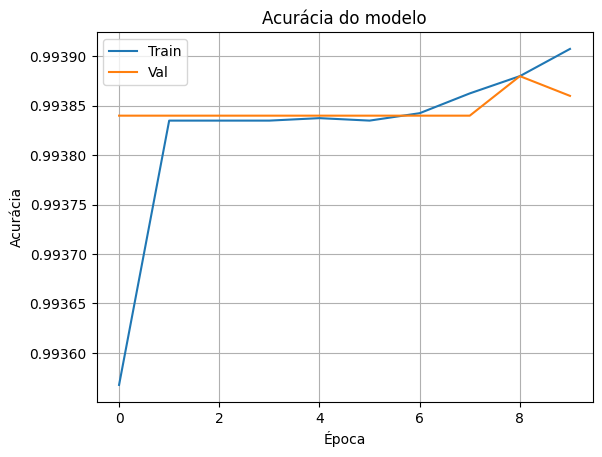

In [18]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

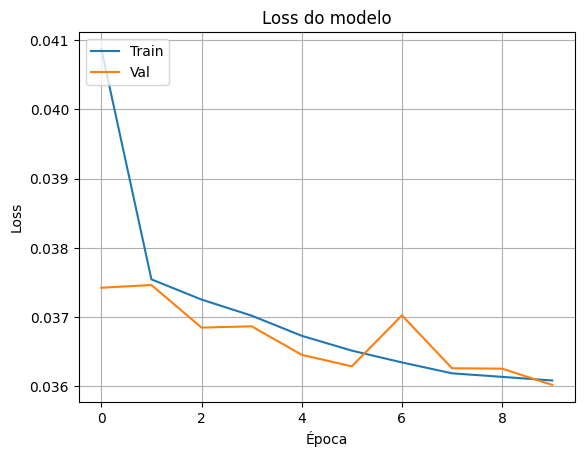

In [19]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss do modelo')
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

7. Avalie o modelo nos conjuntos de treinamento, de validação e de teste.

**DICAS**

+ Use o método `evaluate()` da classe `Sequential`.

In [20]:
# Digite aqui o código do exercício.
print('avaliação do teste',model.evaluate(X_std_test, y_test))
print('avaliação do treino',model.evaluate(X_std_train, y_train))
print('avaliação da validação',model.evaluate(X_std_val, y_val))

1563/1563 [==============================] - 4s 2ms/step - loss: 0.0362 - accuracy: 0.9939
avaliação do teste [0.0362488217651844, 0.9938600063323975]
12500/12500 [==============================] - 31s 2ms/step - loss: 0.0359 - accuracy: 0.9939
avaliação do treino [0.03588316962122917, 0.9939075112342834]
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0360 - accuracy: 0.9939
avaliação da validação [0.03602178394794464, 0.9938600063323975]


8. Baseado no valor da acurácia obtida no item anterior com o conjunto de teste, responda:

+ 1 -  Qual foi a acurácia obtida pelo classificador?
+ 2 - Você diria que este é um bom classificador, ou seja, um classificador que praticamente acerta todas as predições (i.e., classificações)?
+ 3 - O que pode ser feito para nos certificarmos que este é realmente um bom classificador?
  + Observe a expressão para o calculo da acurácia mostrada abaixo:
$$Accuracy = \frac{TN + TP}{TN + TP + FP + FN},$$
onde $TN$, $TP$, $FP$ e $FN$ são os números de verdadeiros negativos, verdadeiros positivos, falsos positivos e falsos negativos, respectivamente.
+ 4 - Na equação da acurácia mostrada acima, o que aconteceria se o valor de $TN$ fosse muitas vezes maior do que $TP$, $FP$ e $FN$? Essa situação afetaria o cálculo da acurácia?

**Justique todas as respostas**.

## **Resposta**
<p>
<font color='cyan'>

  -  1° Respoosta: A acurácia foi de 0.9939 para teste. treino e validação
  - 2° Resposta: Não. Diria que é um bom classificador analisando com a acurácia, mas é enganosa, mesmo que seja um valor alto, e tenha resultados bons, ainda não está avaliado de maneira correta, pelo fato do desbalanceamento das classes positivas e negativas, ele acerta muito bem para classes negatívas que são as maiores e erra praticamente tudo para classes positivas.
  - 3° Resposta: Balancear as classes e analisar novamente a métrica de acurácia depois de balanceada.
  - 4° Resposta: Veja que o valor que teria importância seria apenas TN, portanto TP, FP e FN seriam valores pequenos, o resultado seria aproximadamente 1. Se o contrário TP fosse muito maior também aconteceria a mesma coisa, tendendo ao limite de TP → ∞, o valor da acurácia tenderia a 1.
</p>

9. Plote a matriz de confusão do classificador treinado utilizando o conjunto de teste.

1563/1563 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0  0.9938795 0.9999799 0.9969204     49691
           1  0.7500000 0.0097087 0.0191693       309

    accuracy                      0.9938600     50000
   macro avg  0.8719398 0.5048443 0.5080448     50000
weighted avg  0.9923723 0.9938600 0.9908779     50000



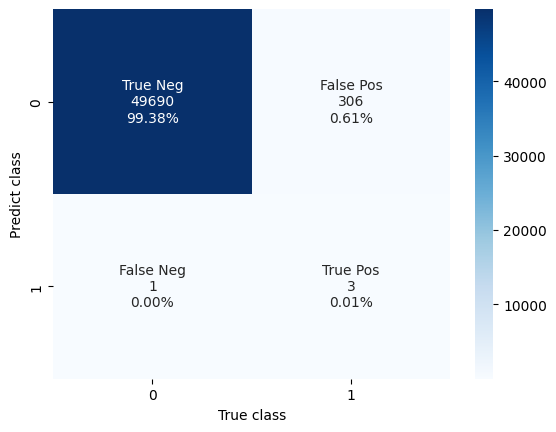

In [21]:
# Digite aqui o código do exercício.

# Realizando predições com o conjunto de teste.
predictions = model.predict(X_std_test)
predictions2 = np.argmax(predictions, axis=1)

# Imprime o reporte de classificação com divisão de zero analisada.
print(classification_report(y_test, predictions2, digits=7, zero_division=1))

# Plot the confusion matrix.
mat = confusion_matrix(y_test, predictions2)
mat = mat.T
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     mat.flatten()/np.sum(mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')
plt.xlabel('True class')
plt.ylabel('Predict class')
plt.show()



#### Observações:

+ `weighted avg` dá média aritmética **ponderada** das métricas para cada classe.
    + Ela atribui pesos diferentes para cada classe, levando em consideração o número de amostras em cada uma delas.
    + Assim, classes com mais amostras tem uma contribuição maior no cálculo da métrica.
    
+ `weighted avg` é útil quando as classes são desbalanceadas, ou seja, quando algumas classes têm um número muito maior de amostras do que outras.

                    precision    recall  f1-score   support
        
      weighted avg  0.9923723 0.9938600 0.9908779     50000

10. Após observar a matriz de confusão, o que você pode concluir?

**DICAS**

+ Analise os valores de verdadeiros positivos e negativos e os valores de falsos positivos e negativos.

**Resposta**

<p>
<font color='cyan'>
Veja que quando as classes são desbalanceadas é interessante analise sobre weighted avg. Também é possível analisar que o retorno da matriz de confusão possui o maior valor linha 0 e coluna 0. E o restante dos valores estão na linha 0 coluna 1. Ou seja classe positiva do teste apresenta apenas 309 valores, e classe negativa possui 49691 valores.

- A classe negativa 49691 (0)
  - Possui 49690 verdadeiras negativas (VN).
  - Possui 1 verdadeiras negativas (FN).
- A classe positiva 309 (1)
  - Possui 306 verdadeiras negativas (FP).
  - Possui  3 verdadeiras negativas (VP).
- Conclusão, o ideal é balancear as classes pois não possui métrica que retornaria em uma análise interessante a ser utilizada.
</p>


11. A acurácia atingida pelo classificador treinado no item anterior é altíssima, parecendo à primeira vista que ele é um classificador quase perfeito. Entretanto, no caso de uma base de dados desbalanceada (ou seja, com classes desbalanceadas), como a deste exercício, a acurácia não é uma métrica útil para esta tarefa. Por exemplo, o classificador treinado anteriormente atinge acurácia de mais de 99% predizendo a classe `negativa` o tempo todo, ou seja, um classificador que sempre prediga a mesma classe terá uma alta acurácia devido ao desbalanceamente das classes. Portanto, precisamos de outra métrica para mensurar a qualidade deste classificador.

Sendo assim, responda:

+ 1° QUESTÃO. Qual é a métrica mais indicada para mensurar a qualidade deste classificador quando as classes são desbalanceadas e os custos associados a falsos positivos são altos? Apresente a equação usada para calcular esta métrica.

+ 2° QUESTÃO. Qual é a métrica mais indicada para mensurar a qualidade deste classificador quando as classes são desbalanceadas e os custos associados a falsos negativos são altos? Apresente a equação usada para calcular esta métrica.

**Justifique todas as respostas**.

**DICAS**

+ Reveja o material de aula onde falamos sobre as métricas utilizadas para mensurar o desempenho de classificadores.

**Resposta**

<p>
<font color='cyan'>

- Resposta 1° Questão: No caso para classes desbalanceadas sendo que a classe negativa é predominante e o custos associados a falsos positivos são altos, é interessante utilizar Precisão como métrica. O fato se deve ao valor desbalanceado ainda estar apenas no denominador e os valores verdadeiros, da diagnal principal, sendo 1 deles o verdadeiro positivo estar presente na equação, balanceando, ou seja mesmo os valores sendo altos, a quantidade se o modelo for bom retornará um valor interessante de precisão.

$$Precisão = \frac{TP}{FP + TP}$$
<p>
<font color='cyan'>

- Resposta 2° Questão: No caso para classes desbalanceadas sendo que a classe negativa é predominante e o custos associados a falsos negativos são altos, é interessante utilizar Recall como métrica. Aqui a mesma situação acima, mesmo observando a quantidade maior no denominador sendo os falsos negativos, o valor quando treinado e o modelo aprendeu corretamente, o valor na diagonal principal sendo apenas 1 deles o verdadeiro positivo sendo valor interessante ele retornara um bom resultado.

$$Recall = \frac{TP}{FN + TP}$$

</p>

12. Imprima o reporte de classificação utilizando o conjunto de teste.

In [23]:
# Digite aqui o código do exercício.
predictions = model.predict(X_std_test)
predictions2 = np.argmax(predictions, axis=1)

# Imprime o reporte de classificação com divisão de zero analisada.
print(classification_report(y_test, predictions2, digits=7, zero_division=1,))

1563/1563 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0  0.9938795 0.9999799 0.9969204     49691
           1  0.7500000 0.0097087 0.0191693       309

    accuracy                      0.9938600     50000
   macro avg  0.8719398 0.5048443 0.5080448     50000
weighted avg  0.9923723 0.9938600 0.9908779     50000



13. Após analisar o valor das métricas no item anterior, responda:

+ 1° Questão. Quais são os valores obtidos após o cálculo das métricas?
+ 2° Questão. O que você pode concluir a respeito deste classificador, ou seja, ele é bom ou ruim para esta tarefa classificação?

**Resposta**

<p>
<font color='cyan'>

- Resposta 1° Questão: o calculo das métricas resultou no caso da precisão para classe 0 (negativa) retornou valor de 0.99382 e para classe 1 (positiva) retornou valor de 1. Recal retornou para classe 0, 1 e para classe 1, 0. F1-score retornou 0.9969004 para classe 0 e 0 para classe 1, ou seja muito alto para valores de classe 0 e baixo para classe 1. por estar debalanceada.
- Resposta 2° Questão: É ruim, pois as classes estão desbalanceadas e no caso possuem apenas quantidade de true negative, ou seja verdadeiro negativo, para classe negativa algo que não podemos afirmar, e assim para classe positiva possui apenas para verdadeiro positivo, true positive.

<p>
<font color='cyan'>
Mesmo com o valor sendo de
            
                  precision    recall  f1-score   support
    weighted avg  0.9923723 0.9938600 0.9908779     50000

A formula que temos para o valor de f1-score também não retorna um valor que podemos confiar. Pois veja:

              precision    recall  f1-score   support

           0  0.9938795 0.9999799 0.9969204     49691
           1  0.7500000 0.0097087 0.0191693       309


$$F1_\text{Score} = \frac{TP}{TP + \frac{FN+FP}{2}}$$

<p>
<font color='cyan'>

Tendendo ao limite o verdadeiro positivo que no caso é o que temos de maior, tambémr retornará 1, portanto não é válido. É necessário balancear as classes.
O valor para 0 foi ótimo no recall e veja agora o valor para 1, classe positiva, foi péssima.
</p>

14. Lidar com um problema altamente desbalanceado, em que as classes têm uma grande discrepância em termos de número de amostras, pode ser um desafio. Portanto, é importante adotar estratégias adequadas para criar conjuntos de treinamento e validação que tenham uma boa proporção entre as classes.

A reamostragem é uma estratégia que envolve a manipulação do conjunto de dados original para criar um equilíbrio entre as classes. Duas abordagens comuns são o oversampling (aumentar as amostras da classe minoritária) e o undersampling (reduzir as amostras da classe majoritária).

A biblioteca `imbalanced-learn` oferece uma série de métodos para realizar essas técnicas, como RandomOverSampler e RandomUnderSampler.

Neste item, usaremos a estratégia do undersampling aleatório (seleciona aleatoriamente uma quantidade específica de amostras para equilibrar as classes), que é adequada quando se possui um grande número de amostras da classe majoritária e deseja-se reduzi-las para equilibrar as classes. O undersampling pode ajudar a reduzir o tempo de treinamento e os requisitos de memória, além de ajudar a mitigar o impacto de amostras ruidosas ou outliers presentes na classe majoritária. No entanto, ao reduzir o conjunto de dados majoritário, você pode perder informações valiosas e diminuir a capacidade do modelo de aprender padrões complexos.

Em geral, não há uma abordagem única que funcione melhor para todos os casos. Recomenda-se experimentar diferentes técnicas e avaliar os resultados com base nas métricas relevantes para o problema específico.

Execute a célula de código abaixo. Ela aplica a estratégia do undersampling, reduzindo o número de amostras da classe majoritária, e plota o histograma com a quantidade de amostras de cada classe após o undersampling.

**OBS**.: O novo conjunto de dados já está dividido em novos conjuntos de treinamento e validação.

**DICAS**

+ O novo conjunto total de amostras é dado por `X_resampled` e `y_resampled`, que são a nova matriz de atributos e o novo vetor de rótulos, respectivamente.
+ Os novos conjuntos de treinamento e validação são dados por `X_train/y_train` e `X_test/y_test`, respectivamente.

#### Referências

[1] 'A Gentle Introduction to Imbalanced Classification', https://machinelearningmastery.com/what-is-imbalanced-classification/

[2] '8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset', https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

[3] 'Solving The Class Imbalance Problem', https://towardsdatascience.com/solving-the-class-imbalance-problem-58cb926b5a0f

[4] 'Imbalanced Data : How to handle Imbalanced Classification Problems', https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

# VERIFICAR VALIDACAO BALANCEADA|

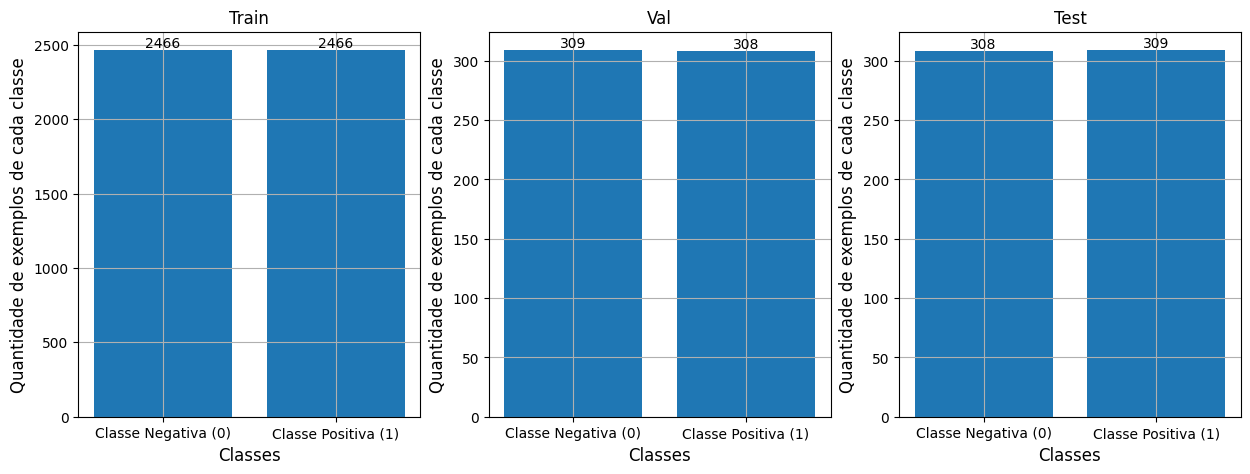

In [24]:
# Importa a classe que realiza o undersampling dos exemplos da base de dados.
from imblearn.under_sampling import RandomUnderSampler

# Instancia um objeto da classe que realiza o undersampling dos exemplos da base de dados.
sme = RandomUnderSampler(sampling_strategy='majority', random_state=seed)

# Executa o oversampling e undersampling no conjunto total de dados.
X_resampled, y_resampled = sme.fit_resample(X, y)

# Divide o conjunto total de amostras em conjuntos de treinamento e validação/teste.
# O parâmetro 'stratify=y' garante que as proporções de classes sejam mantidas nos conjuntos divididos.
X_train, X_val_test, y_train, y_val_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=seed)

# Divide o conjunto de validação/teste em conjuntos de validação e teste.
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test)

# Plota histograma com a quantidade de exemplos por classe de cada subconjunto.
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))

bars_train = ax1.bar(['Classe Negativa (0)','Classe Positiva (1)'], [len(y_train[y_train==0]), len(y_train[y_train==1])])
ax1.bar_label(bars_train)
ax1.grid()
ax1.set_title('Train')
ax1.set_xlabel('Classes', fontsize=12)
ax1.set_ylabel('Quantidade de exemplos de cada classe', fontsize=12)

bars_val = ax2.bar(['Classe Negativa (0)','Classe Positiva (1)'], [len(y_val[y_val==0]), len(y_val[y_val==1])])
ax2.bar_label(bars_val)
ax2.grid()
ax2.set_title('Val')
ax2.set_xlabel('Classes', fontsize=12)
ax2.set_ylabel('Quantidade de exemplos de cada classe', fontsize=12)

bars_test = ax3.bar(['Classe Negativa (0)','Classe Positiva (1)'], [len(y_test[y_test==0]), len(y_test[y_test==1])])
ax3.bar_label(bars_test)
ax3.grid()
ax3.set_title('Test')
ax3.set_xlabel('Classes', fontsize=12)
ax3.set_ylabel('Quantidade de exemplos de cada classe', fontsize=12)

plt.show()

15. Analise a figura acima e responda:

+ O que ocorreu com a quantidade de amostras das duas classes?

(**Justifique sua resposta**).

**DICAS**

+ Verifique o número de amostras das duas classes no item 2.

**Resposta**

<p>
<font color='cyan'>
No caso temos agora balanceamento de classes positivas e negativas, agora não existe algo desbalanceado e as métricas de análise pode-se ser mais acertiva em utilizar-se de alguma das existentes. Foi utilizado as bibliotecas acima RandomUnderSampler, que retira as amostras da classe majoritária para equilibrar a quantidade de dados
</p>


16. Normalize os novos conjuntos de dados.

**DICAS**

+ Para padronizar, utilize a classe `MinMaxScaler` da biblioteca SciKit-Learn. Para mais informações, acesse [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

In [25]:

from sklearn.preprocessing import MinMaxScaler

# Digite aqui o código do exercício.

scaler = MinMaxScaler()

X_std_train = scaler.fit_transform(X_train)
X_std_val = scaler.transform(X_val)
X_std_test = scaler.transform(X_test)


print('dados de teste antes da padronização\n\n',X_test,'\n\nvalor máximo:\n',X_test.max(),'\nvalor mínimo\n',X_test.min(),'\n')
print('dados de teste após padronização usando MinMaxScaler:\n\n', X_std_test,'\n\nvalor maximo\n', X_std_test.max() ,'\nvalor mínimo\n',X_std_test.min(),'\n\n\n')

print('dados de treino após padronização usando MinMaxScaler:\n\n', X_std_train,'\n\nvalor maximo\n', X_std_train.max() ,'\nvalor mínimo\n',X_std_train.min(),'\n\n\n')

print('dados de validação após padronização usando MinMaxScaler:\n\n', X_std_val,'\n\nvalor maximo\n', X_std_val.max() ,'\nvalor mínimo\n',X_std_val.min(),'\n\n\n')


dados de teste antes da padronização

 [[-3.01031081 -0.87486802  1.47656723 ... -0.32779982 -0.36125803
   0.53858398]
 [ 0.95308832 -0.73904602  1.40291064 ... -0.14480343  0.65470845
   0.34344093]
 [ 1.19794956  0.16467132 -0.83023937 ... -0.40728522 -2.42727084
   0.77983929]
 ...
 [ 3.08540242 -0.97897649  0.86005582 ... -1.03950522  0.41473482
   0.05621412]
 [ 1.2152343  -1.13354629  0.66103361 ... -1.4879333   0.33331137
   0.45889895]
 [ 0.39005733  0.13678046 -0.77016602 ... -0.40669661 -0.74792003
  -1.88309914]] 

valor máximo:
 3.3353167727263555 
valor mínimo
 -4.042169681126918 

dados de teste após padronização usando MinMaxScaler:

 [[0.0803698  0.29936647 0.72649477 ... 0.56940191 0.44091787 0.59578567]
 [0.67546472 0.32458255 0.71470569 ... 0.59414975 0.57831291 0.56778036]
 [0.71223005 0.49236254 0.35727967 ... 0.55865257 0.16151897 0.63040863]
 ...
 [0.9956266  0.28003817 0.62781925 ... 0.47315321 0.54585988 0.52655996]
 [0.71482532 0.25134146 0.59596483 ... 0.412

In [26]:
print('dimensão train',X_std_train.shape)
print('dimensão teste',X_std_test.shape)
print('dimensão val',X_std_val.shape)

dimensão train (4932, 10)
dimensão teste (617, 10)
dimensão val (617, 10)


17. Treine um novo classificador com o novo conjunto de treinamento. Passe o conjunto de validação para o método `fit`.

**DICAS**

Você pode utilizar otimização hiperparamétrica para encontrar a melhor arquitetura.

In [44]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(10))

    # Número de camadas ocultas aleatoriamente (1, 2 ou 3).
    n_layers = hp.Choice("n_layers",[1,2])

    for i in range(n_layers):
      n_units = hp.Choice('units_'+str(i),[10, 15, 20])
      model.add(tf.keras.layers.Dense(n_units,activation='relu'))

    n_learning_rate = hp.Choice('learning_rate',[0.001, 0.01 ,0.005])
    opt = tf.keras.optimizers.Adam(learning_rate=n_learning_rate)

    model.add(tf.keras.layers.Dense(2, activation="sigmoid"))

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [46]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Número de tentativas
    directory='./another_projetct3',  # Diretório para salvar os resultados
    project_name='my_project'  # Nome do projeto
)


In [47]:
tuner.search(
    X_std_train, y_train,
    epochs=30,
    validation_data=(X_std_test, y_test)
)

Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.5640194416046143

Best val_accuracy So Far: 0.5688816905021667
Total elapsed time: 00h 01m 36s


In [48]:
tuner.results_summary()

Results summary
Results in ./another_projetct3/my_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
n_layers: 2
units_0: 20
learning_rate: 0.01
units_1: 15
Score: 0.5688816905021667

Trial 0 summary
Hyperparameters:
n_layers: 2
units_0: 15
learning_rate: 0.005
units_1: 10
Score: 0.5672609210014343

Trial 4 summary
Hyperparameters:
n_layers: 1
units_0: 20
learning_rate: 0.005
units_1: 20
Score: 0.5640194416046143

Trial 1 summary
Hyperparameters:
n_layers: 2
units_0: 15
learning_rate: 0.001
units_1: 15
Score: 0.5623987317085266

Trial 2 summary
Hyperparameters:
n_layers: 1
units_0: 20
learning_rate: 0.01
units_1: 15
Score: 0.5559157133102417


### <font color='cyan'> Se baseando no melhor modelo dito anteriormente, coloquei abaixo o modelo que representa um destes melhores deste. Porém feito algumas modificações, de acordo com testes

In [86]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=[10], activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 20)                220       
                                                                 
 dense_24 (Dense)            (None, 2)                 42        
                                                                 
Total params: 262 (1.02 KB)
Trainable params: 262 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
history = model.fit(
    X_std_train, y_train,
    epochs=30,
    validation_data=(X_std_test, y_test),
)

Epoch 1/30
155/155 [==============================] - 1s 4ms/step - loss: 0.6977 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5057
Epoch 2/30
155/155 [==============================] - 1s 3ms/step - loss: 0.6908 - accuracy: 0.5292 - val_loss: 0.6902 - val_accuracy: 0.5251
Epoch 3/30
155/155 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.5454 - val_loss: 0.6882 - val_accuracy: 0.5511
Epoch 4/30
155/155 [==============================] - 1s 4ms/step - loss: 0.6844 - accuracy: 0.5456 - val_loss: 0.6878 - val_accuracy: 0.5284
Epoch 5/30
155/155 [==============================] - 1s 4ms/step - loss: 0.6824 - accuracy: 0.5554 - val_loss: 0.6879 - val_accuracy: 0.5413
Epoch 6/30
155/155 [==============================] - 1s 5ms/step - loss: 0.6816 - accuracy: 0.5501 - val_loss: 0.6900 - val_accuracy: 0.5462
Epoch 7/30
155/155 [==============================] - 1s 4ms/step - loss: 0.6816 - accuracy: 0.5521 - val_loss: 0.6870 - val_accuracy: 0.5348
Epoch 

18. Plote a matriz de confusão deste novo classificador utilizando o novo conjunto de teste.

20/20 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0  0.5268293 0.7012987 0.6016713       308
           1  0.5555556 0.3721683 0.4457364       309

    accuracy                      0.5364668       617
   macro avg  0.5411924 0.5367335 0.5237039       617
weighted avg  0.5412157 0.5364668 0.5235775       617



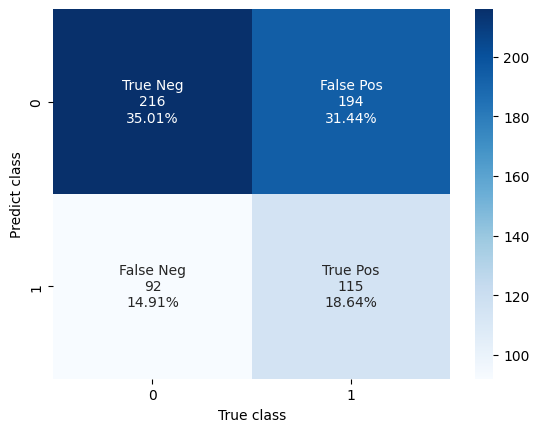

In [89]:
# Digite aqui o código do exercício.

# Realizando predições com o conjunto de teste.
predictions = model.predict(X_std_test)
predictions2 = np.argmax(predictions, axis=1)

# Imprime o reporte de classificação com divisão de zero analisada.
print(classification_report(y_test, predictions2, digits=7, zero_division=1))

# Plot the confusion matrix.
mat = confusion_matrix(y_test, predictions2)
mat = mat.T
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     mat.flatten()/np.sum(mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')
plt.xlabel('True class')
plt.ylabel('Predict class')
plt.show()



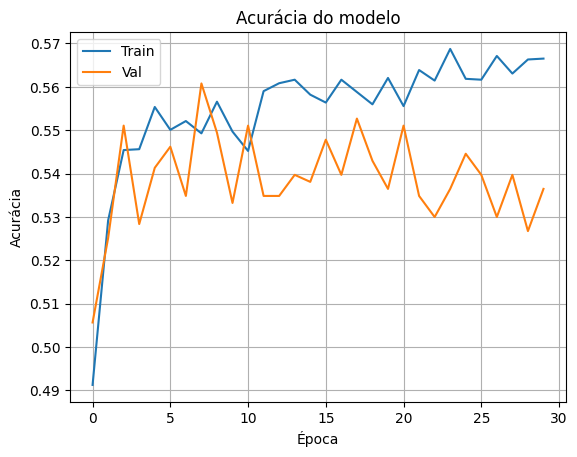

In [90]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

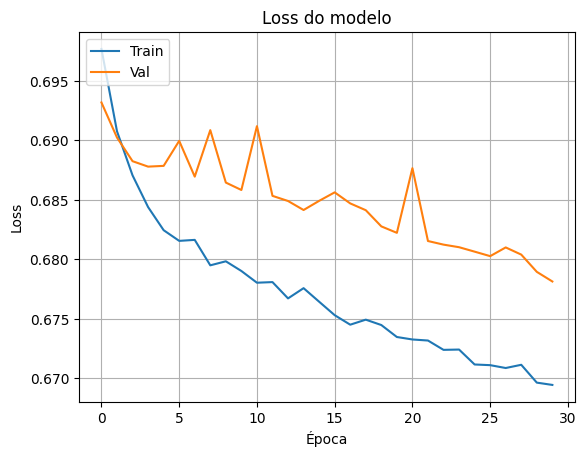

In [91]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss do modelo')
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

19. Imprima o reporte de classificação utilizando o novo conjunto de teste.

In [92]:
# Digite aqui o código do exercício.

# Imprime o reporte de classificação com divisão de zero analisada.
print(classification_report(y_test, predictions2, digits=7, zero_division=1))

              precision    recall  f1-score   support

           0  0.5268293 0.7012987 0.6016713       308
           1  0.5555556 0.3721683 0.4457364       309

    accuracy                      0.5364668       617
   macro avg  0.5411924 0.5367335 0.5237039       617
weighted avg  0.5412157 0.5364668 0.5235775       617



20. Comparando a matriz de confusão do item 9 e o reporte de classificação do item 12 com os resultados obtidos com este novo classificador, responda:

+ 1° Questão: As acurácias de treinamento e validação tiveram seus valores reduzidos ou aumentados com este novo modelo?
+ 2° Questão: As métricas que você definiu no item 8 e calculou no item 9 tiveram seus valores reduzidos ou aumentados com este novo modelo?
+ 3° Questão: Em resumo, levando-se em conta todas as métricas calculadas, pode-se dizer que este novo modelo é um bom classificador?

**Justifique todas as respostas**.

**Resposta**

<p>
<font color='cyan'>

- Resposta 1° Questão: Reduzidas, devido ao modelo mesmo com a classificação dos dados estarem agora balanceadas, os valores diminuíram, devido a retirada de amostras da classe majoritária. Também devido a quantidade de valores para classificação. Devido aos valores as classes foram separadas novamente em FP e VN ou TP. E pela quantidade podemos analisar sobre o ponto de vista da precisão, pelo fato do predominante ser a classe do Falso positivo. analisando a precisão observas-se. weighted avg  precision 0.7500007.
- Resposta 2° Questão: A precisão referente ao valor para as classe classificada como positiva que antes não tinha nenhum valor, era zero, agora temos 0,55, portanto aumentou assim como o valor de macro avg, para o f1-score, devido ao valor antigo do recall do macro avg, ser 0,5 anteriormente, agora melhorou pois as classes estão equilibradas, antes estavam desbalanceadas, devido a quantidade ser muito superior da classe negativa do que a positiva, e assim o modelo fica muito bom para apenas classficiar uma classe.
- Resposta 3° Questão: Não, agora temos um ajuste mais adequado, pois anteriormente para 1 classe tínhamos o acerto completo, porém para outra ficou péssimo para classe 0 estava ruim, e agora estamos na média, nem tão bom para classe 0 e assim nem tanto para classe 1. Ainda sim o classificador acerta muito para a classe negativa, e para positiva ainda tem mais erro do que acerto. Mas de qualquer forma, isto foi o que consegui.
<p>